## PREDICTING SALES DATA USING LSTM

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df = pd.read_csv('../DATA/RSCCASN.csv' , parse_dates=True ,index_col='DATE' )

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 1992-01-01 to 2019-10-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   RSCCASN  334 non-null    int64
dtypes: int64(1)
memory usage: 5.2 KB


In [13]:
df.columns = ['Sales']

<AxesSubplot:xlabel='DATE'>

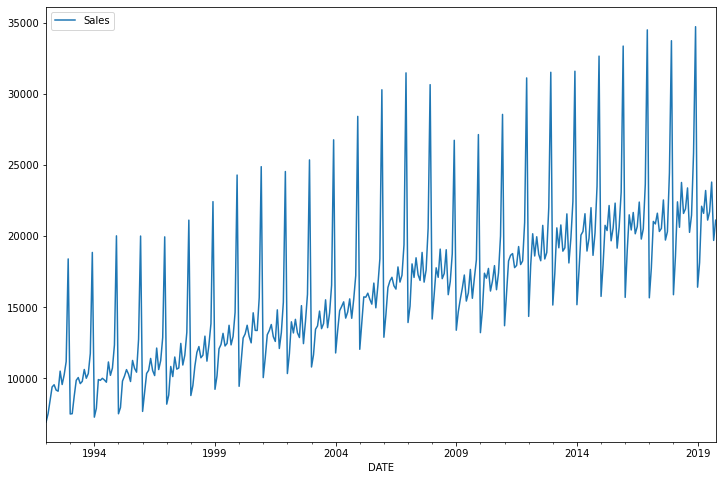

In [15]:
df.plot(figsize=(12,8))

In [17]:
len(df)
df  # Lets choose 2 years data for predicting it ,so as the dataframe is monthly ,we need to choose 24 months..

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [21]:
length = len(df)
train_index=length-24

train = df.iloc[:train_index]

In [22]:
len(train)

310

In [23]:
test = df.iloc[train_index:]

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scalar = MinMaxScaler()

In [28]:
scalar.fit(train)

MinMaxScaler()

In [30]:
scaled_train = scalar.transform(train)

In [32]:
scaled_test = scalar.transform(test)

In [33]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [34]:
length = 18   #Length denotes the length of the actual batches
batch_size=1

generator = TimeseriesGenerator(scaled_train,scaled_train , 
                               length=length,
                               batch_size=1)

In [35]:
X,y = generator[0]  # Batch size is that we are getting one array for x and the other array for y..A batchsize of 1 is best for a RNN..

In [40]:
len(X[0]) # It has double dimensions , so to get the required length we add the 0 in the square brackets, which is equal to the length you specified

18

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , LSTM

In [42]:
n_features =1

In [43]:
model = Sequential()

In [ ]:
# A Simple LSTM Model

In [44]:
model.add(LSTM(100,activation='relu',input_shape=(length ,n_features)))  #You can set activation on your own
model.add(Dense(1))
model.compile(optimizer = 'adam' , loss='mse')

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [47]:
from tensorflow.keras.callbacks import EarlyStopping

In [48]:
early_stop = EarlyStopping(monitor='val_loss' ,patience=2)  # The patience compensates for the noise produced in an RNN

In [49]:
validation_generator = TimeseriesGenerator(scaled_test , scaled_test ,length=length ,batch_size=1)

In [50]:
model.fit(generator , epochs=15,
         validation_data =validation_generator,
         callbacks=[early_stop])

Epoch 1/15
292/292 [==============================] - 2s 6ms/step - loss: 0.0241 - val_loss: 0.0032
Epoch 2/15
292/292 [==============================] - 2s 6ms/step - loss: 0.0207 - val_loss: 0.0030
Epoch 3/15
292/292 [==============================] - 1s 5ms/step - loss: 0.0206 - val_loss: 0.0244
Epoch 4/15
292/292 [==============================] - 1s 5ms/step - loss: 0.0195 - val_loss: 0.0188
